In [1]:
# svd_image_compression.py
"""Volume 1A: SVD and Image Compression.
<John Wilson>
<7/5/2017>
"""

from scipy import linalg as la
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Problem 1
def truncated_svd(A,k=None):
    """Computes the truncated SVD of A. If r is None or equals the number
        of nonzero singular values, it is the compact SVD.
    Parameters:
        A: the matrix
        k: the number of singular values to use
    Returns:
        U - the matrix U in the SVD
        s - the diagonals of Sigma in the SVD
        Vh - the matrix V^H in the SVD
    """
    tol=10e-6
    AHA=np.dot(np.conjugate(A.T),A)
    sigsq,vecs=la.eigh(AHA)
    n = len(sigsq[sigsq>tol])
    if k is None or k>n:
        k=n
    indices=np.argsort(sigsq)[-k:]
    indices=indices[::-1]
    sigsq=sigsq[indices]
    sig=np.sqrt(sigsq)
    vecs=vecs[:,indices]
    u=np.zeros((A.shape[0],k))
    for i in range(k):
        u[:,i]=1./sig[i]*np.dot(A,vecs[:,i])
    return u,sig,vecs

A test case for the svd function, using an example from the book

In [3]:
A = np.array([[2,5,4],[6,3,0],[6,3,0],[2,5,4]])
u,s,v=truncated_svd(A)
print(u)
print(s)
print(v)
np.allclose(u@np.diag(s)@v.T,A)

[[-0.5 -0.5]
 [-0.5  0.5]
 [-0.5  0.5]
 [-0.5 -0.5]]
[ 12.   6.]
[[-0.66666667  0.66666667]
 [-0.66666667 -0.33333333]
 [-0.33333333 -0.66666667]]


True

In [4]:
# Problem 2
def visualize_svd():
    """Plot each transformation associated with the SVD of A."""
    A=np.array([[3,1],[1,3]])
    dom = np.linspace(0,2*np.pi,100)
    domr = np.linspace(0,1,20)
    C = np.array([np.cos(dom),np.sin(dom)])
    U,s,V = la.svd(A)
    S=np.diag(s)
    C1=np.dot(V,C)
    C2=np.dot(S,C1)
    C3=np.dot(U,C2)
    e1 = np.array([1,0])
    e2 = np.array([0,1])
    e1x = domr*e1[0]
    e1y = domr*e1[1]
    e2x = domr*e2[0]
    e2y = domr*e2[1]
    E1 = np.vstack((e1x,e1y))
    E2 = np.vstack((e2x,e2y))
    E1a=np.dot(V,E1)
    E1b=np.dot(S,E1a)
    E1c=np.dot(U,E1b)
    E2a=np.dot(V,E2)
    E2b=np.dot(S,E2a)
    E2c=np.dot(U,E2b)
    
    plt.subplot(221)
    plt.plot(C[0],C[1])
    plt.plot(E1[0],E1[1])
    plt.plot(E2[0],E2[1])
    plt.axis("equal")
    
    plt.subplot(222)
    plt.plot(C1[0],C1[1])
    plt.plot(E1a[0],E1a[1])
    plt.plot(E2a[0],E2a[1])
    plt.axis("equal") 
    
    plt.subplot(223)
    plt.plot(C2[0],C2[1])
    plt.plot(E1b[0],E1b[1])
    plt.plot(E2b[0],E2b[1])
    plt.axis("equal")  
    
    plt.subplot(224)
    plt.plot(C3[0],C3[1])
    plt.plot(E1c[0],E1c[1])
    plt.plot(E2c[0],E2c[1])
    plt.axis("equal")
    
    plt.show()

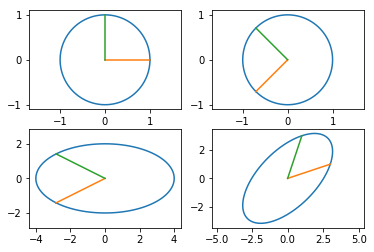

In [5]:
visualize_svd()

In [6]:
# Problem 3
def svd_approx(A, k):
    """Returns best rank k approximation to A with respect to the induced 2-norm.

    Inputs:
    A - np.ndarray of size mxn
    k - rank

    Return:
    Ahat - the best rank k approximation
    """
    U,s,Vh=la.svd(A, full_matrices=False)
    S=np.diag(s[:k])
    return U[:,:k].dot(S).dot(Vh[:k,:])

In [7]:
# Problem 4
def lowest_rank_approx(A,e):
    """Returns the lowest rank approximation of A with error less than e
    with respect to the induced 2-norm.

    Inputs:
    A - np.ndarray of size mxn
    e - error

    Return:
    Ahat - the lowest rank approximation of A with error less than e.
    """
    U,s,V=la.svd(A,full_matrices=False)
    n=len(s)
    i=0
    while s[i] >= e and i<n:
        i+=1
        if i==n:
            break
    return svd_approx(A,i)

A test case for both problems 3 and 4. It should return the rank 2 approximation of A, again as given in the book.

In [8]:
A = np.array([[2,5,4],[6,3,0],[6,3,0],[2,5,4]])
lowest_rank_approx(A,1e-13)

array([[  2.00000000e+00,   5.00000000e+00,   4.00000000e+00],
       [  6.00000000e+00,   3.00000000e+00,  -4.44089210e-16],
       [  6.00000000e+00,   3.00000000e+00,  -6.66133815e-16],
       [  2.00000000e+00,   5.00000000e+00,   4.00000000e+00]])

In [9]:
# Problem 5
def compress_image(k,filename='hubble_image.jpg'):
    """Plot the original image found at 'filename' and the rank k approximation
    of the image found at 'filename.'

    filename - jpg image file path
    k - rank
    """
    X=plt.imread(filename).astype(float)
    R=X[:,:,0]
    G=X[:,:,1]
    B=X[:,:,2]
    m,n=R.shape
    R=svd_approx(R,k)
    G=svd_approx(G,k)
    B=svd_approx(B,k)
    rm=np.amax(R)
    gm=np.amax(G)
    bm=np.amax(B)
    xm=np.amax(X)
    R/=rm
    G/=gm
    B/=bm
    X/=xm
    matr=[R,G,B,X]
    for x in matr:
        c=x>1
        x[c]=1
        b=x<0
        x[b]=0
    im=np.zeros((m,n,3))
    im[:,:,0]=R
    im[:,:,1]=G
    im[:,:,2]=B
    plt.subplot(121)
    plt.imshow(X)
    plt.subplot(122)
    plt.imshow(im)
    plt.show()

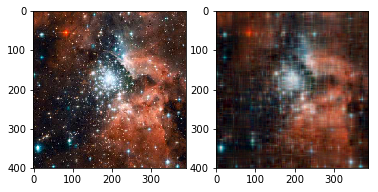

In [12]:
compress_image(14)

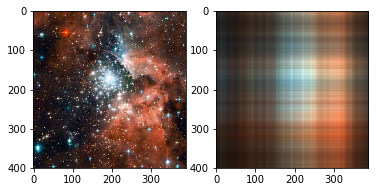

In [13]:
compress_image(1)

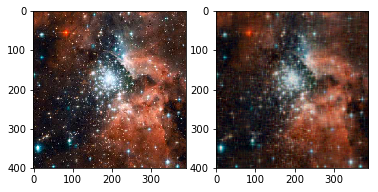

In [14]:
compress_image(27)